# Clustering (Unsupervised Machine Learning)

Datasource: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster 
The dataset contsist of 17 attributes and 2111 records explore CVD's

# Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

# About Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association.

In [2]:
# Importing the data
import pandas as pd
ObseityData = pd.read_csv('D:\ivy\datasets/ObesityDataSet.csv')
ObseityData.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
ObseityData.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
# Keeping the target variable for future reference
TargetVariable=ObseityData['NObeyesdad']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=ObseityData.drop('NObeyesdad', axis=1)

OnlyPredictors.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [10]:
OnlyPredictors=OnlyPredictors.replace({'Female': 2, 'Male':1})

In [13]:
OnlyPredictors=pd.get_dummies(OnlyPredictors, dtype=int)

In [14]:
OnlyPredictors

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,2,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,...,0,0,0,0,1,0,0,0,1,0
1,2,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
2,1,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,...,0,0,1,0,0,0,0,0,0,1
4,1,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,...,0,0,0,1,0,0,0,0,1,0
2107,2,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,...,0,0,0,1,0,0,0,0,1,0
2108,2,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,...,0,0,0,1,0,0,0,0,1,0
2109,2,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
OnlyPredictors.isnull().sum()

Gender                                0
Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CH2O                                  0
FAF                                   0
TUE                                   0
family_history_with_overweight_no     0
family_history_with_overweight_yes    0
FAVC_no                               0
FAVC_yes                              0
CAEC_Always                           0
CAEC_Frequently                       0
CAEC_Sometimes                        0
CAEC_no                               0
SMOKE_no                              0
SMOKE_yes                             0
SCC_no                                0
SCC_yes                               0
CALC_Always                           0
CALC_Frequently                       0
CALC_Sometimes                        0
CALC_no                               0


In [16]:
# Taking out only the Predictor variables
y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:10])

[[ 2.   21.    1.62 64.    2.    3.    2.    0.    1.    0.    1.    1.
   0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.    0.
   1.    0.    0.    0.    1.    0.  ]
 [ 2.   21.    1.52 56.    3.    3.    3.    3.    0.    0.    1.    1.
   0.    0.    0.    1.    0.    0.    1.    0.    1.    0.    0.    1.
   0.    0.    0.    0.    1.    0.  ]
 [ 1.   23.    1.8  77.    2.    3.    2.    2.    1.    0.    1.    1.
   0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    1.    0.
   0.    0.    0.    0.    1.    0.  ]
 [ 1.   27.    1.8  87.    3.    3.    2.    2.    0.    1.    0.    1.
   0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    1.    0.
   0.    0.    0.    0.    0.    1.  ]
 [ 1.   22.    1.78 89.8   2.    1.    2.    0.    0.    1.    0.    1.
   0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.    1.
   0.    0.    0.    0.    1.    0.  ]
 [ 1.   29.    1.62 53.    2.    3.    2.    0.    0.    1.    0.    0.
   1.    0.  

[1541662.0162316617, 503535.1580727161, 282023.43922109675, 197346.4924750888, 159539.07724772955, 126442.3068933849, 100147.09315192318, 91190.73336619377, 83623.59818040709, 76756.86164391962, 70133.79796208758, 63626.93582905051, 60636.440753956995, 56977.59807248837, 51058.3892154956, 45851.30614705572, 43708.894303211186]


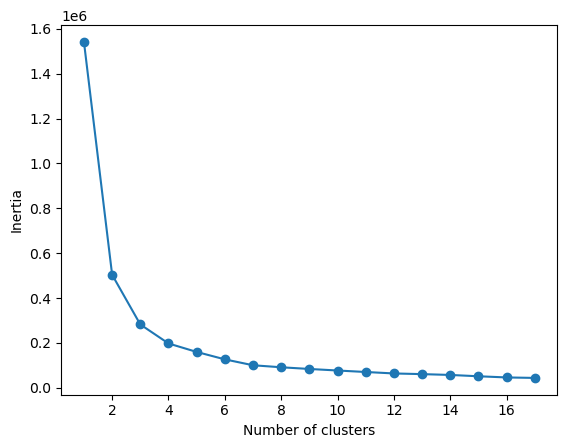

In [19]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 18):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 18), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
#plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
print(inertiaValue)
#plt.show()

Using above graph deciding optimal number of clusters

In [28]:
# Defining the K-Means object for best number of clusters. n=4 in this case
km = KMeans(n_clusters=4, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=0.0001,
            random_state=4)

In [29]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[1 1 2 ... 0 0 0]
Inertia: 197316.9957445117


In [34]:
ObseityData['PredictedClusterID']=predictedCluster
ObseityData.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,PredictedClusterID
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2


In [33]:
ObseityData.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,PredictedClusterID
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,0
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III,0


In [43]:
ObseityData.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
PredictedClusterID                   4
dtype: int64